# Matplotlib Legend

To add a legend to a plot in matplotlib, first label it with the `label` keyword argument. Then, before `plt.show()`, call `plt.legend()` your plot will be displayed with a legend.

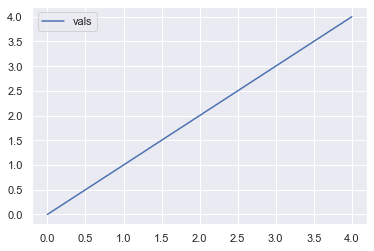

In [136]:
# Import necessary modules
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

# Generate data
vals = np.array([0, 1, 2, 3, 4])

# Plot and label
plt.plot(vals, label='vals')

plt.legend()
plt.show()

If you plot and label multiple lines, the legend will contain multiple entries. 

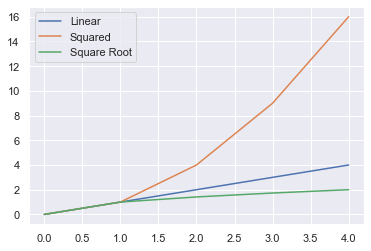

In [121]:
plt.plot(vals, label='Linear')
plt.plot(vals**2, label='Squared')
plt.plot(vals**0.5, label='Square Root')

plt.legend()
plt.show()

You can combine different types of plot - [scatter](https://blog.finxter.com/matplotlib-scatter-plot/), [line](https://blog.finxter.com/matplotlib-line-plot/), [histogram](https://blog.finxter.com/matplotlib-histogram/) etc. - but you may have to specify the colors manually if you do.

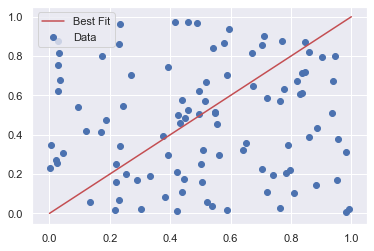

In [135]:
import random

random.seed(1)

# Generate random data
x = [random.random() for _ in range(100)]
y = [random.random() for _ in range(100)]

# Scatter plot
plt.scatter(x, y, label='Data')

# Red line plot acting as the 'line of best fit'
plt.plot([0, 1], label='Best Fit', c='r')
plt.legend()
plt.show()

In this example, I first [generated some random data](https://blog.finxter.com/python-random-module/) before making a scatter plot from it. Then, I drew a line plot on top of it to act as the line of best fit (note that this is just an example and isn't actually the line of best fit for this dataset!). Unfortunately, matplotlib does not automatically change the color of each plot if you plot a line and a scatter plot on top of each other. So, I manually changed it to red with the `c` keyword argument.

Let's dive into a more detailed example of how legends work in matplotlib. 

## Matplotlib Legend Example

To display a legend on any plot, you must call `plt.legend()` at some point in your code - usually, just before `plt.show()` is a good place. 

There are 3 ways you can call it:
1. `plt.legend()`
2. `plt.legend(labels)`
3. `plt.legend(handles, labels)`

The first option - `plt.legend()` - automatically detects which elements to show. It does this by displaying all plots that have been labeled with the `label` keyword argument. The order of the lines in the legend are the same as the order you plot them. 


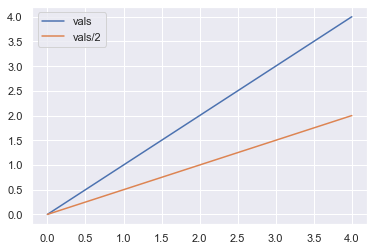

In [89]:
vals = np.array([0, 1, 2, 3, 4])

# Plot vals first
plt.plot(vals, label='vals')

# Plot vals/2 second
plt.plot(vals/2, label='vals/2')

# Call plt.legend() without arguments
plt.legend()
plt.show()

First I plotted `vals` and then plotted `vals/2`. You can see that `vals` is displayed first in the legend and is a blue line. Now let's swap the order.

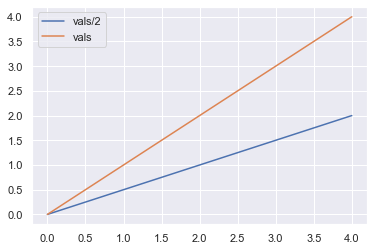

In [90]:
# Plot vals/2 first
plt.plot(vals/2, label='vals/2')

# Plot vals second
plt.plot(vals, label='vals')

# Call plt.legend() without arguments
plt.legend()
plt.show()

Now `vals/2` is displayed first in the legend and is colored blue. By changing the order of the plots, you change not only the order in the legend but also the colors of the lines. 

Note: you can manually control the colors using the `c` keyword argument if you want to.

The second option -` plt.legend(labels)` - is rarely used but I'll show you what it does just for completeness. 

The argument `labels` must be an iterable - most likely a list or tuple - containing the labels you want to display in the legend. Instead of explicitly labeling each line you draw like so:

```python
plt.plot(x_1, label='plot_1')
plt.plot(x_2, label='plot_2')
plt.legend()
plt.show()
```

You do not label any of the lines explicitly and instead label them based on the order they appear:

```python
plt.plot(x_1)
plt.plot(x_2)
plt.legend(['plot_1', 'plot_2'])
plt.show()
```

This method does work but can cause you a lot of headaches. For example, the iterable `labels` must be exactly the same length as the number of lines you draw. Moreover, if you change the order of any of your plots, you must also change the order of the elements in `labels`. Lastly, it violates The Zen of Python *Explicit is better than implicit* because you implicitly label each plot based on its order. 

It is much easier for everyone if you explicitly label each of the plots rather than implicitly doing so like this. Thus, both the [matplotlib docs](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) and I do not recommend you use this method. 

The final method - `plt.legend(handles, labels)` - provides you with the most flexibility but takes slightly longer to write. 

Both `handles` and `labels` are iterables - usually lists or tuples. The `handles` are the lines you wish to appear on the legend and the `labels` are, as I hope you know by now, the word(s) you want to appear in the legend next to each line. 

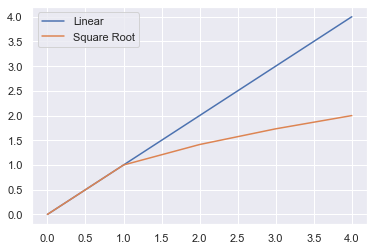

In [144]:
# Save plots with descriptive variable names
linear, = plt.plot(vals)
sqrt, = plt.plot(vals**0.5)

# Create iterables handles and labels
handles = [linear, sqrt]
labels = ['Linear', 'Square Root']

# Pass handles and lables to plt.legend()
plt.legend(handles, labels)
plt.show()

First, you must save the output of each line in a variable. The function `plt.plot()` returns a `list` of length 1, so you must unpack it by putting a comma after your variable name to get the value inside the list. The value is a `matplotlib.lines.Line2D` object which is how matplotlib stores lines.

```python
# linear_wrong is a list of length 1
linear_wrong = plt.plot(val)

# linear_correct is a Line2D object - what you want
linear_correct, = plt.plot(val)
```

For ease of reading, I created the lists `handles` and `labels` which I then passed to `plt.legend()`. You can skip this intermediate step if you wish. 

The biggest advantage of this method is that you have total control of the order in which the legend's items appear: the order you pass `handles` is the order they will appear. This means you can plot them in any order you want and still control the order of the legend entries. This is in contract to method 1 where the order you plot your lines is the order they appear in the legend. 

So, to make `Square Root` appear as the first entry in the legend, do the following.

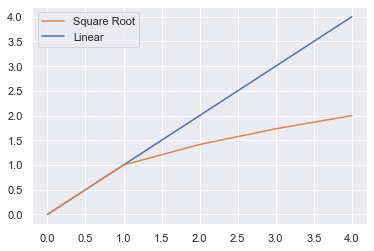

In [146]:
linear, = plt.plot(vals)
sqrt, = plt.plot(vals**0.5)

# Swap order of sqrt and linear
handles_ = [sqrt, linear]
labels_ = ['Square Root', 'Linear']

plt.legend(handles_, labels_)
plt.show()

In this plot, the color of the lines has not changed but the order in the legend has changed because I changed the lists `handles` and `labels`. 

Finally, one thing many Python programmers don't know is that if your label starts with an underscore, it will not be displayed in the legend. This may be useful if you have many plots and want to be able to easily scan the code but not display the names in the plots.

No handles with labels found to put in legend.


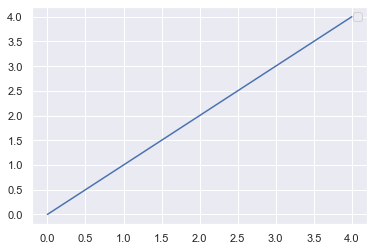

In [149]:
# No legend displayed because of underscore
plt.plot(vals, label='_I will not be displayed')
plt.legend()
plt.show()

## Matplotlib Legend Location

To change the location of a legend in matplotlib, use the `loc` keyword argument in `plt.legend()`. 

By default, matplotlib draws the legend in the ‘best’ location i.e. the place that overlaps the least with the lines drawn. This can be slow if you plot a lot of data, so manually setting a location can speed up the process. 

To manually set it, use the `loc` keyword and one of these 10, self-explanatory, strings:

* `‘upper right’`, `‘upper left’`, `‘upper center’`
* `‘lower right’`, `‘lower left’`, `‘lower center’`
* `‘center right’` or `‘center left’`
* `‘right’` or `‘center’` (for some reason, `‘left’` is not an option)

Here are some examples of putting the legend in different locations. If you are unsure how to [plot subplots in matplotlib](https://blog.finxter.com/matplotlib-subplots/), check out my article.

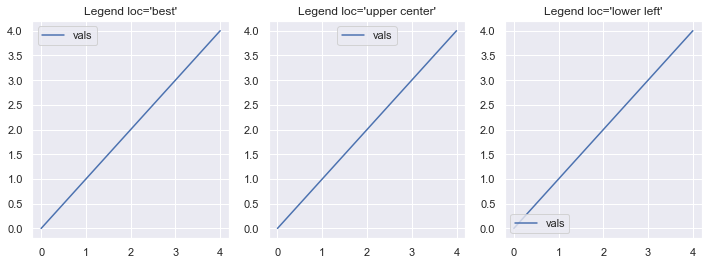

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=plt.figaspect(1/3))

# Differnet legend locations
locations = ['best', 'upper center', 'lower left']

for ax, loc in zip(axes.flat, locations):
    ax.plot(vals, label='vals')
    ax.set_title(f"Legend loc='{loc}'")
    
    # Set legend location
    ax.legend(loc=loc)
plt.show()

You can change the default location for all plots by setting `plt.rcParams['legend.loc']` to the `loc` value of your choice. 

Finally, you can choose any coordinate points by passing a 2-tuple to `loc` instead of a string. This will specify the location of the lower-left corner of the legend as a *fraction of the axes*. So setting `loc=(0.5, 0.5)` will place the bottom left corner half way along the x-axis and half way along the y-axis. 

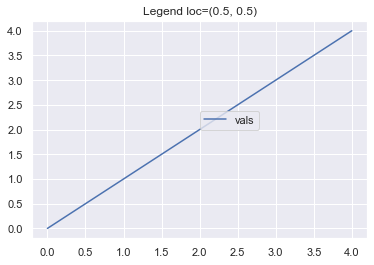

In [111]:
plt.plot(vals, label='vals')

# Set location of legend
plt.legend(loc=(0.5, 0.5))

plt.title('Legend loc=(0.5, 0.5)')
plt.show()

If you input `loc=(2, 2)` you get a very stange looking graph because matplotlib places the legend at double the length and double the height of the axes. 

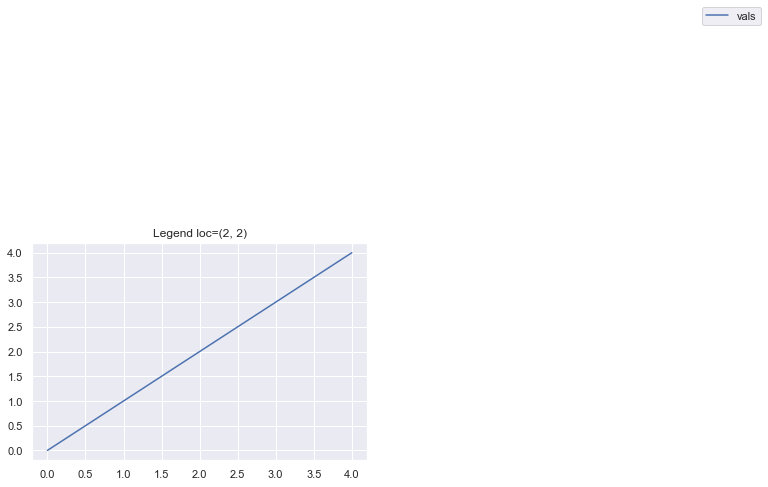

In [110]:
plt.plot(vals, label='vals')

# Set location of legend
plt.legend(loc=(2, 2))

plt.title('Legend loc=(2, 2)')
plt.show()

Of course, it is possible to place the legend at any coordinate point you want. Just remember to scale it by the maximum x- and y-axis values (both `4` in this example). So, to place the legend at the coordinate points `(2, 3)`, pass `loc=(2/4, 3/4)`

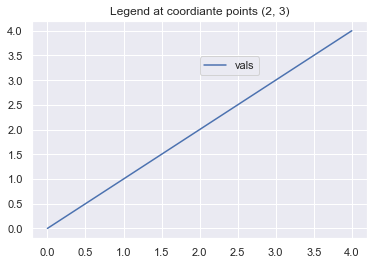

In [109]:
plt.plot(vals, label='vals')

# Set location of legend
plt.legend(loc=(2/4, 3/4))

plt.title('Legend at coordiante points (2, 3)')
plt.show()

## Matplotlib Legend Font Size

To change the fontsize of a legend, use the `fontsize` keyword argument. It can take any int or float - the absolute size in points. Try lots of different sizes to get a feel for it.

You can also pass one of several strings: 

```python
['xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large']
```

These are all relative to the current default font size. Let's look at some examples.

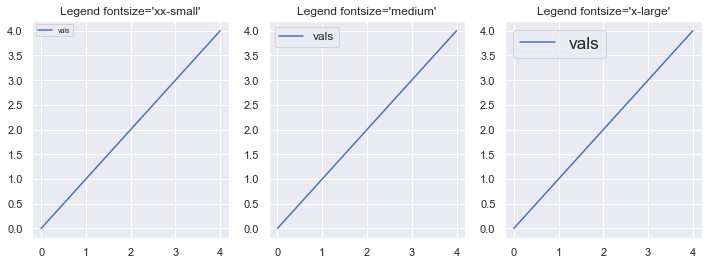

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=plt.figaspect(1/3))

# Different font sizes to try
fonts = ['xx-small', 'medium', 'x-large']

for ax, font in zip(axes.flat, fonts):
    ax.plot(vals, label='vals')
    ax.set_title(f"Legend fontsize='{font}'")
    
    # Set fontsize in legend
    ax.legend(fontsize=font)    
plt.show()

## Matplotlib Legend Title

To add a title to a legend use the `title` keyword argument. 

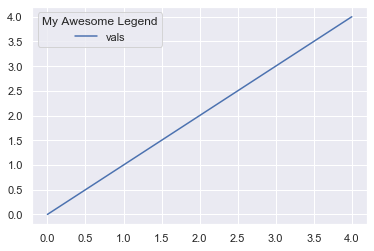

In [151]:
plt.plot(vals, label='vals')

# Add title to legend
plt.legend(title='My Awesome Legend')
plt.show()

## Matplotlib Legend Title Font Size

To change the font size of the title for a legend in matplotlib use the `title_fontsize` keyword argument. Like the `fontsize` keyword argument, it accepts any int or float - the absolute size in points - or one of the fontsize strings. 

The [matplotlib docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend) are actually incorrect because they say that `title_fontsize` only accepts a string or `None`.

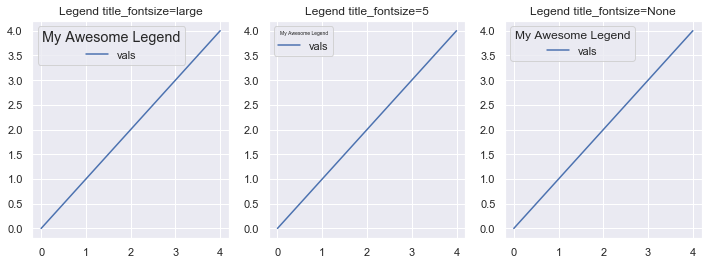

In [152]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=plt.figaspect(1/3))

# Differnet fontsizes to try
title_size = ['large', 5, None]

for ax, size in zip(axes.flat, title_size):
    ax.plot(vals, label='vals')
    ax.set_title(f"Legend title_fontsize={size}")
    
    # Set title_fontsize of the legend
    ax.legend(title='My Awesome Legend', title_fontsize=size)
plt.show()

## Matplotlib Legend Color

You can change both the `facecolor` and `edgecolor` of a legend using those keyword arguments in the function call. 

The `facecolor` is the main color and the `edgecolor` is, you guessed it, the color around the edge of the box. 

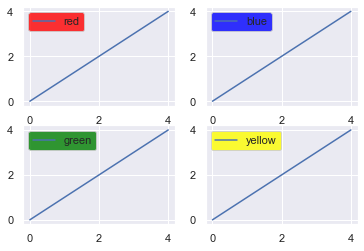

In [113]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# facecolors to choose
colors = ['red', 'blue', 'green', 'yellow']

for ax, color in zip(axes.flat, colors):
    ax.plot(vals, label=color)
    
    # Set facecolor of the legend
    ax.legend(facecolor=color)
plt.show()

Let's do the same now but just change the edge color.

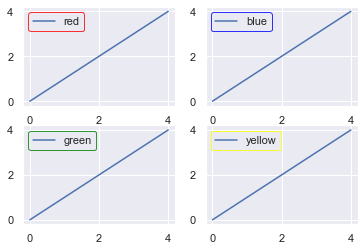

In [154]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# Edgecolors to choose
colors = ['red', 'blue', 'green', 'yellow']

for ax, color in zip(axes.flat, colors):
    ax.plot(vals, label=color)
    
    # Choose edgecolor of legend
    ax.legend(edgecolor=color)
plt.show()

Of course, you can mix and match the face and edge colors to your hearts content.

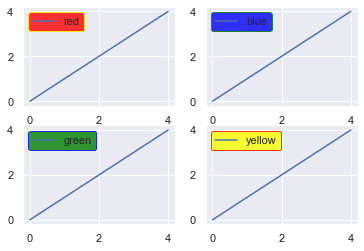

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# Colors to use
colors = ['red', 'blue', 'green', 'yellow']

# Same as colors but reversed
edges = colors[::-1]

for ax, color, edge in zip(axes.flat, colors, edges):
    ax.plot([0, 1, 2, 3, 4], label=color)
    
    # Choose both the facecolor and edgecolor
    ax.legend(facecolor=color, edgecolor=edge)
plt.show()

## Matplotlib Legend Order

To learn how to order elements in a legend, check out the Matplotlib Legend Example section.

## Matplotlib Legend Background Color

To learn how to change the background color of a legend, check out the Matplotlib Legend Color section. 

## Conclusion

That's it, you now know all the basics of working with legends in matplotlib. 

You know the three different ways to call the function - `plt.legend()`, `plt.legend(labels)` and `plt.legend(handles, labels)` - you know how to set its location with both strings and coordinate points. Plus you can change the font size, set a title and even change the font size of the title. Lastly, you can jazz up your legends by setting the facecolor or edgecolor to anything you want. 

## Where To Go From Here?

Do you wish you could be a programmer full-time but don’t know how to start?

Check out the pure value-packed webinar where Chris – creator of Finxter.com – teaches you to become a Python freelancer in 60 days or your money back!

https://tinyurl.com/become-a-python-freelancer

It doesn’t matter if you’re a Python novice or Python pro. If you are not making six figures/year with Python right now, you will learn something from this webinar.

These are proven, no-BS methods that get you results fast.

This webinar won’t be online forever. Click the link below before the seats fill up and learn how to become a Python freelancer, guaranteed.

https://tinyurl.com/become-a-python-freelancer